# Task-2 : Write a python code to filter given image using following size filters

Kernel K for our 3*3 Box filter : 
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Kernel K for our 5*5 Box filter : 
 [[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


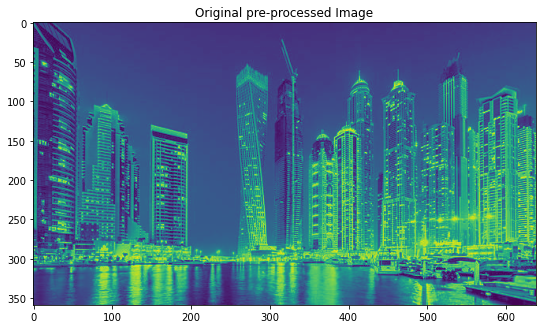

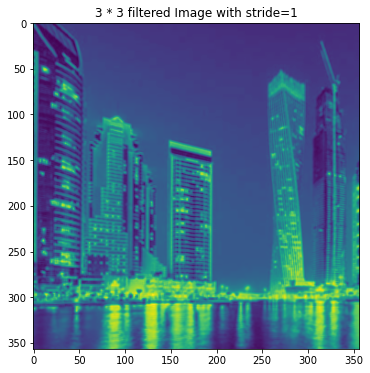

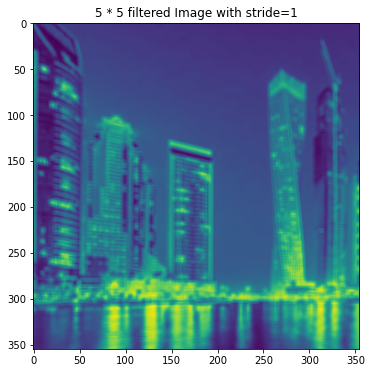

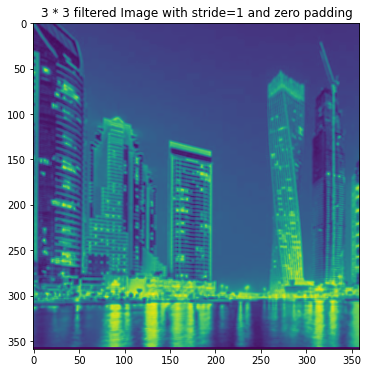

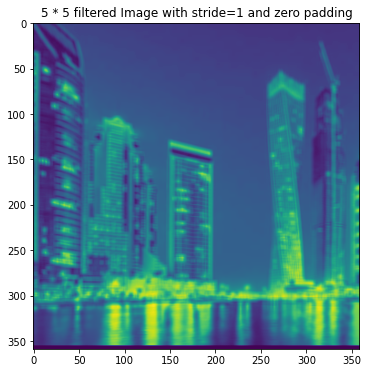

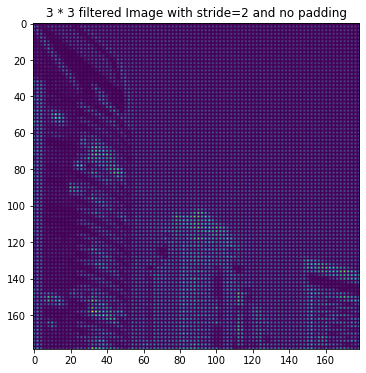

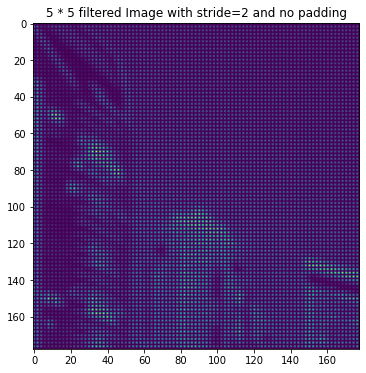

In [11]:
import sys

import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.measure 


def processImage(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
    return image


def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


if __name__ == '__main__':
    
    image = processImage('../input/building/building.jpeg')
    plt.subplots(1, figsize=(9,6)),plt.imshow(image)
    plt.title('Original pre-processed Image')
    kernel3 = np.ones((3,3), np.float32)/9
    print("Kernel K for our 3*3 Box filter : \n",kernel3)
    kernel5 = np.ones((5,5), np.float32)/25
    print("Kernel K for our 5*5 Box filter : \n",kernel5)
    
    # Convolve and Save Output
    output1 = convolve2D(image, kernel3, padding=1, strides = 1)
    output2 = convolve2D(image, kernel5, padding=2, strides = 1)
    output3 = convolve2D(image, kernel3, padding=0, strides = 2)
    output4 = convolve2D(image, kernel5, padding=0, strides = 2)
    output5 = convolve2D(image, kernel3, padding=0, strides = 1)
    output6 = convolve2D(image, kernel5, padding=0, strides = 1)
    
    plt.subplots(1, figsize=(9,6)),plt.imshow(output5)
    plt.title('3 * 3 filtered Image with stride=1')
    plt.subplots(1, figsize=(9,6)),plt.imshow(output6)
    plt.title('5 * 5 filtered Image with stride=1')
    plt.subplots(1, figsize=(9,6)),plt.imshow(output1)
    plt.title('3 * 3 filtered Image with stride=1 and zero padding')
    plt.subplots(1, figsize=(9,6)),plt.imshow(output2)
    plt.title('5 * 5 filtered Image with stride=1 and zero padding')
    plt.subplots(1, figsize=(9,6)),plt.imshow(output3)
    plt.title('3 * 3 filtered Image with stride=2 and no padding')
    plt.subplots(1, figsize=(9,6)),plt.imshow(output4)
    plt.title('5 * 5 filtered Image with stride=2 and no padding')

Entropies of above filtered images

In [12]:
import numpy as np
marg = np.histogramdd(np.ravel(output5), bins = 256)[0]/output5.size
marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy1 = -np.sum(np.multiply(marg, np.log2(marg)))
print("Entropy of 3 * 3 filtered image with stride=1 is : ",entropy1)
a = np.histogramdd(np.ravel(output6), bins = 256)[0]/output6.size
a = list(filter(lambda p: p > 0, np.ravel(a)))
entropy2 = -np.sum(np.multiply(a, np.log2(a)))
print("Entropy of 5 * 5 filtered image with stride=1 is : ",entropy2)
b = np.histogramdd(np.ravel(output1), bins = 256)[0]/output1.size
b = list(filter(lambda p: p > 0, np.ravel(b)))
entropy3 = -np.sum(np.multiply(b, np.log2(b)))
print("Entropy of 3 * 3 filtered Image with stride=1 and zero padding : ",entropy3)
c = np.histogramdd(np.ravel(output2), bins = 256)[0]/output2.size
c = list(filter(lambda p: p > 0, np.ravel(c)))
entropy4 = -np.sum(np.multiply(c, np.log2(c)))
print("Entropy of 5 * 5 filtered Image with stride=1 and zero padding : ",entropy4)
d = np.histogramdd(np.ravel(output3), bins = 256)[0]/output3.size
d = list(filter(lambda p: p > 0, np.ravel(d)))
entropy5 = -np.sum(np.multiply(d, np.log2(d)))
print("Entropy of 3 * 3 filtered Image with stride=2 : ",entropy5)
e = np.histogramdd(np.ravel(output4), bins = 256)[0]/output4.size
e = list(filter(lambda p: p > 0, np.ravel(e)))
entropy6 = -np.sum(np.multiply(e, np.log2(e)))
print("Entropy of 5 * 5 filtered Image with stride=2 : ",entropy6)

Entropy of 3 * 3 filtered image with stride=1 is :  7.357937525752547
Entropy of 5 * 5 filtered image with stride=1 is :  7.3559184521696945
Entropy of 3 * 3 filtered Image with stride=1 and zero padding :  7.335499994294069
Entropy of 5 * 5 filtered Image with stride=1 and zero padding :  7.317049322495667
Entropy of 3 * 3 filtered Image with stride=2 :  2.5761518132699717
Entropy of 5 * 5 filtered Image with stride=2 :  2.5715688595278916
